___
# PROJETO 1

## <font color='red'>ANA LÚCIA CAPRILES PORT</font>
___

## <font color='blue'>Comparação entre a situação de aposentados brancos e negros</font>

## Introdução

Serão analisadas as diferenças entre dois subgrupos de aposentados, de acordo com a raça: brancos e negros (pretos e pardos). 
    
Um relatório divulgado pela ONU em 2014 apontou que os negros do país são os que mais são assassinados, 
os que têm menor escolaridade, menores salários, menor acesso ao sistema de saúde e os que morrem mais cedo. 
Também é o grupo populacional brasileiro que mais está presente no sistema prisional e o que menos ocupa postos nos governos. 
Segundo o relatório, o desemprego entre os afro-brasileiros é 50% superior ao restante da sociedade, enquanto a renda é metade 
da registrada entre a população branca. Assim, vale verificar se essa forte distinção também se encontra presente entre os aposentados
negros em relação aos brancos, e como essa situação evoluiu historicamente, comparando a PNAD 2001 com a PNAD 2014.

Deve-se levar em consideração que, para o IBGE, a categoria "negros" abrange tanto pretos como pardos.

Notícia: Racismo no Brasil é institucionalizado, diz ONU
http://noticias.uol.com.br/ultimas-noticias/agencia-estado/2014/09/12/racismo-no-brasil-e-institucionalizado-diz-onu.htm

___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pnad2014 = pd.read_csv('PES2014.csv', sep=",")

### Inicialmente, vamos contar qual é o número de brancos e negros na população brasileira como um todo.
Vemos que a população negra (soma de pretos e pardos) representa 56.841879% da população, ao passo que os brancos representam 
42.267674% da população. O restante é composto pelas raças amarela e indígena, e uma pequena parcela da população que não declarou 
sua raça.

In [3]:
pnad2014.V0404.value_counts(True) * 100 

8    47.936861
2    42.267674
4     8.905018
0     0.494999
6     0.394896
9     0.000552
Name: V0404, dtype: float64

Limitaremos a análise do banco de dados para os brancos e os negros, excluindo as raças amarela e indígena. Também 
limitaremos a análise do banco de dados apenas para as pessoas aposentadas, a fim de comparar o subgrupo dos aposentados negros (pretos + pardos) e 
brancos.

In [5]:
pnad2014 = pnad2014[(pnad2014.V0404 == 2) | (pnad2014.V0404 == 4) | (pnad2014.V0404 == 8)]

pnad2014 = pnad2014[(pnad2014.V9122 == 2)]

In [6]:
#nomeando as categorias

#Sexo
pnad2014.sexo = pnad2014.V0302.astype('category') #2 masculino, 4 feminino

#Raça
pnad2014.raca = pnad2014.V0404.astype('category') # 2 branca, 4 preta, 8 pardos (negro = preto + pardo)

#Nível de instrução mais elevado alcançado (todas as pessoas)
pnad2014.nivel_escolar = pnad2014.V4745.astype('category')
pnad2014.nivel_escolar.cat.categories = ('Sem instrução', 'Fundamental incompleto ou equivalente', 
                                        'Fundamental completo ou equivalente', 'Médio incompleto ou equivalente',
                                        'Médio completo ou equivalente', 'Superior incompleto ou equivalente',
                                        'Superior completo', 'Não determinado')

#Faixa de rendimento mensal domiciliar per capita 
pnad2014.renda = pnad2014.V4750.astype('float')
pnad2014.renda = pnad2014.renda[pnad2014.renda < 500000]

#Rendimento de aposentadoria de instituto de previdência ou do governo federal que recebia, normalmente, no mês de referência
pnad2014.aposentadoria = pnad2014.V1252.astype('float')
pnad2014.aposentadoria = pnad2014.V1252[(pnad2014.V1252 < 500000)]

pnad2014.anos_estudo = pnad2014.V4803.astype('float')

pnad2014.curso = pnad2014.V6007.astype('category')

pnad2014.idade = pnad2014.V8005.astype('float')

pnad2014.sabe_ler_escrever = pnad2014.V0601.astype('category')

### Agora que temos o total de brancos e negros, vamos verificar o número de aposentados brancos e negros. 
Vemos que 51.505017% dos aposentados são brancos, em comparação a 48.494983% de aposentados pretos e pardos. Começamos com a 
constatação de que, apesar de os negros serem maioria na população (56.841879%), são minoria no subgrupo dos aposentados 
(48.494983%).

In [10]:
# contando entre o número de brancos e negros aposentados, com o bando de dados restringido.
pnad2014.V0404.value_counts(True) *100

2    51.505017
8    39.514528
4     8.980456
Name: V0404, dtype: float64

### Comparação entre as rendas

In [64]:
pnad2014.renda.branca = pnad2014.renda[pnad2014.raca == 2]
pnad2014.renda.preta = pnad2014.renda[pnad2014.raca == 4] 
pnad2014.renda.parda = pnad2014.renda[pnad2014.raca == 8]

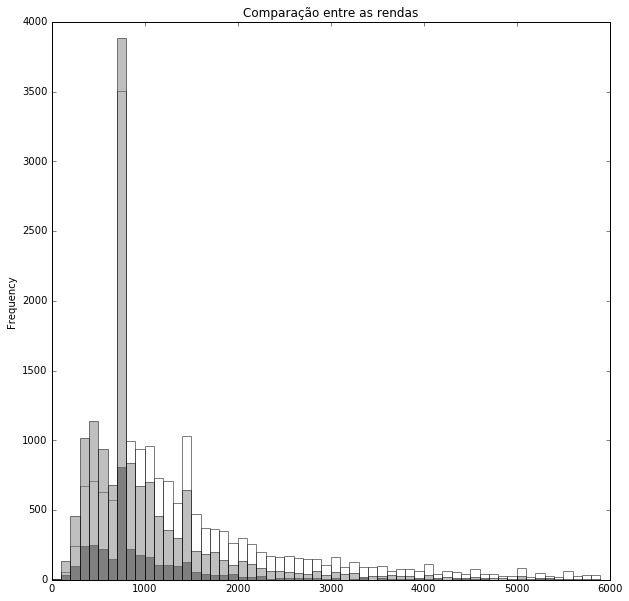

In [65]:
faixa_r =  np.arange(0,6000,100)
plot = pnad2014.renda.branca.plot.hist(bins=faixa_r,color = "white",label = 'Branca',alpha=0.5, figsize=(10,10), title="Comparação entre as rendas")
plot = pnad2014.renda.preta.plot.hist(bins=faixa_r,color = "black",label = 'Branca',alpha=0.5, figsize=(10,10), title="Comparação entre as rendas")
plot = pnad2014.renda.parda.plot.hist(bins=faixa_r,color = "gray",label = 'Branca',alpha=0.5, figsize=(10,10), title="Comparação entre as rendas")

### Mediana da renda
Os aposentados brancos ganham mais que os aposentados negros. A mediana do primeiro grupo é 1108 reais, ao passo que a mediana do 
grupo dos negros é 732 reais.

In [66]:
print(pnad2014.renda.branca.median())
print(pnad2014.renda.preta.median())
print(pnad2014.renda.parda.median())

1108.0
732.0
724.0


### Gráficos de correlação para renda em função dos anos de estudo

Coeficiente angular da reta de tendência:  222.927544732
Coeficiente linear da reta de tendência:  218.472893098


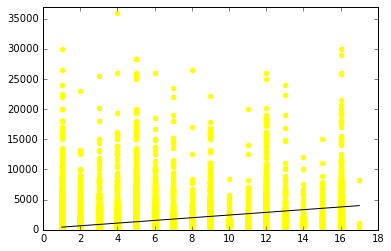

In [91]:
def disp_reta(anos_estudo, renda, cor1, cor2):
    m = anos_estudo.cov(renda) / anos_estudo.var()
    n = renda.mean() - m * anos_estudo.mean()
    plt.plot((anos_estudo.min(), anos_estudo.max()), (m * anos_estudo.min() + n, m * anos_estudo.max() + n), color=cor1)
    plt.scatter(anos_estudo,renda,color=cor2)
    plt.axis([0,18,0,37000])
    print("Coeficiente angular da reta de tendência: ", m)
    print("Coeficiente linear da reta de tendência: ", n)

disp_reta(anos_estudo.brancos, pnad2014.renda.branca, "black", "yellow")

Coeficiente angular da reta de tendência:  120.932947572
Coeficiente linear da reta de tendência:  526.820734667


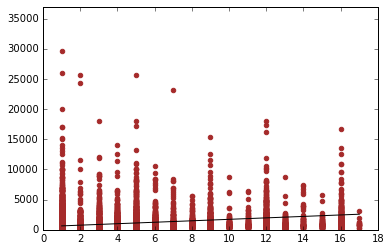

In [93]:
disp_reta(anos_estudo.pardos, pnad2014.renda.parda, "black", "brown")

Coeficiente angular da reta de tendência:  99.698597274
Coeficiente linear da reta de tendência:  541.150519811


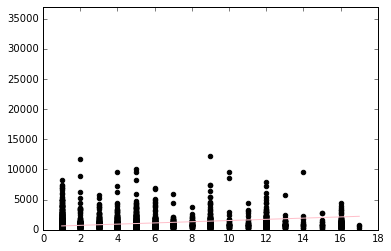

In [95]:
disp_reta(anos_estudo.pretos, pnad2014.renda.preta, "pink", "black")

### Comparação entre os três gráficos de correlação
Vemos que o coeficiente angular é: 222.92 para os brancos, 120.93 para os pardos e para os negros, 99.69.
Assim, verificamos que quanto mais anos os brancos estudam, sua tendência é ganhar mais em relação ao grupo dos negros, o que
revela que este grupo pode estar sub-representado na sociedade, bem como sofrer de problemas, de variadas origens (histórica, por
exemplo).

In [18]:
anos_estudo = pd.crosstab(pnad2014.anos_estudo,pnad2014.raca,margins=True)

anos_estudo.columns = ['Branca',
'Preta', 'Parda',
'Ambos']

anos_estudo.index = ['menos que 1 ano',
'1 ano',
'2 anos',
'3 anos',
'4 anos',
'5 anos',
'6 anos',
'7 anos',
'8 anos',
'9 anos',
'10 anos',
'11 anos',
'12 anos',
'13 anos',
'14 anos',
'15 anos',
'não determinado',
'All']


anos_estudo

,Branca,Preta,Parda,Ambos
menos que 1 ano,3194,1161,5381,9736
1 ano,572,140,652,1364
2 anos,1008,201,977,2186
3 anos,1249,229,1068,2546
4 anos,3434,464,2060,5958
5 anos,1270,196,667,2133
6 anos,507,83,359,949
7 anos,268,47,228,543
8 anos,1549,252,969,2770
9 anos,107,30,85,222


In [19]:
curso_mais_elevado = pd.crosstab(pnad2014.curso,pnad2014.raca,margins=True)

curso_mais_elevado.columns = ['Branca',
'Preta','Parda',
'Ambos']

curso_mais_elevado.index = ['Elementar (primário)',
'Médio 1º ciclo (ginasial, etc.)',
'Médio 2º ciclo (científico, clássico, etc.)',
'Regular do ensino fundamental ou do 1º grau',
'Regular do ensino médio ou do 2º grau',
'Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1º grau',
'Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau',
'Superior de graduação',
'Mestrado ou doutorado',
'Alfabetização de jovens e adultos',
'Creche',
'Classe de alfabetização - CA',
'Maternal, jardim de infância etc',
'All']

curso_mais_elevado

,Branca,Preta,Parda,Ambos
Elementar (primário),7631,1245,5824,14700
"Médio 1º ciclo (ginasial, etc.)",1544,242,891,2677
"Médio 2º ciclo (científico, clássico, etc.)",1391,144,653,2188
Regular do ensino fundamental ou do 1º grau,1290,325,1252,2867
Regular do ensino médio ou do 2º grau,1692,270,991,2953
Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1º grau,171,59,242,472
Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau,244,39,131,414
Superior de graduação,3171,204,949,4324
Mestrado ou doutorado,185,7,50,242
Alfabetização de jovens e adultos,90,37,184,311


### Maior curso frequentado - Brancos

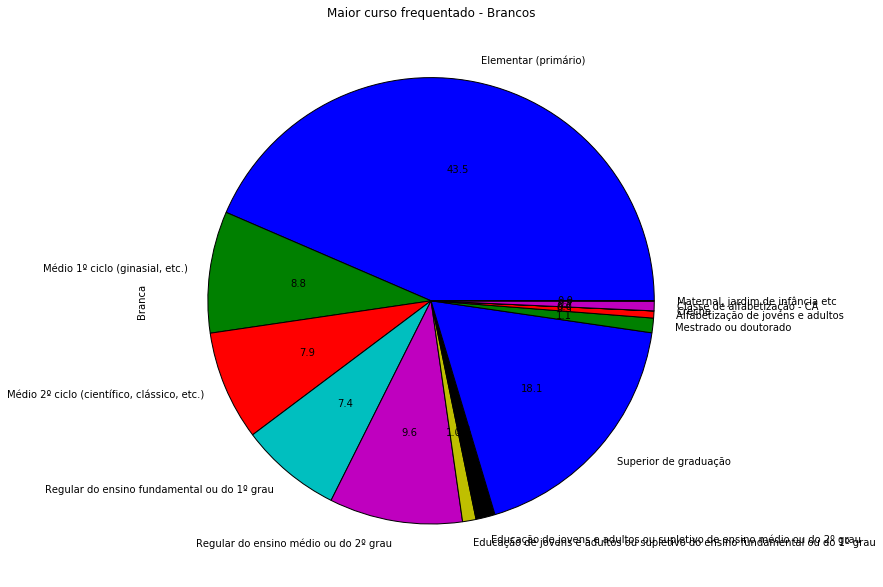

In [20]:
graf1 = curso_mais_elevado.iloc[:13,0]

plot = graf1.plot(kind='pie',title='Maior curso frequentado - Brancos',autopct='%.1f',figsize=(10, 10))

### Maior curso frequentado - Negros

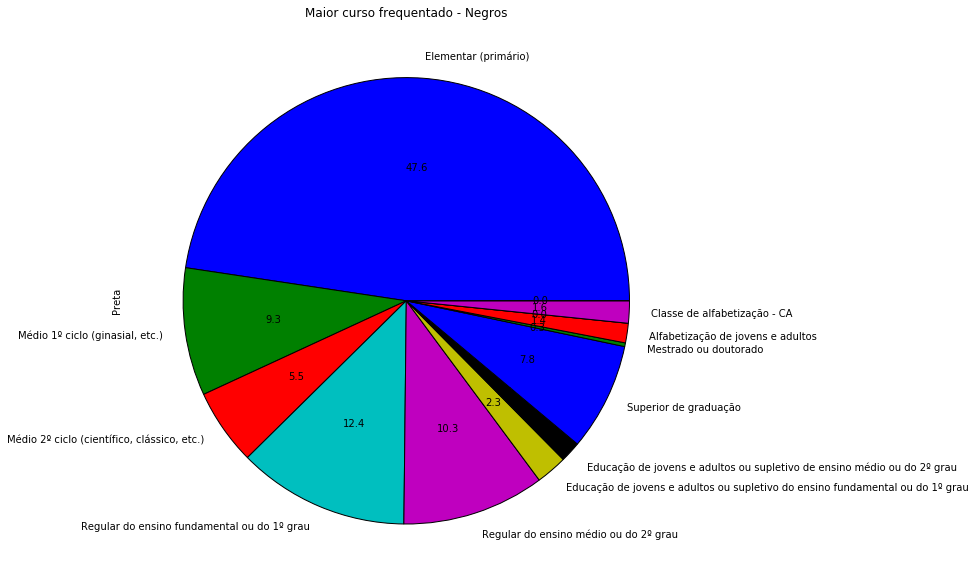

In [21]:
graf2 = curso_mais_elevado.iloc[:13,1]

plot = graf2.plot(kind='pie',title='Maior curso frequentado - Negros',autopct='%.1f',figsize=(10, 10))

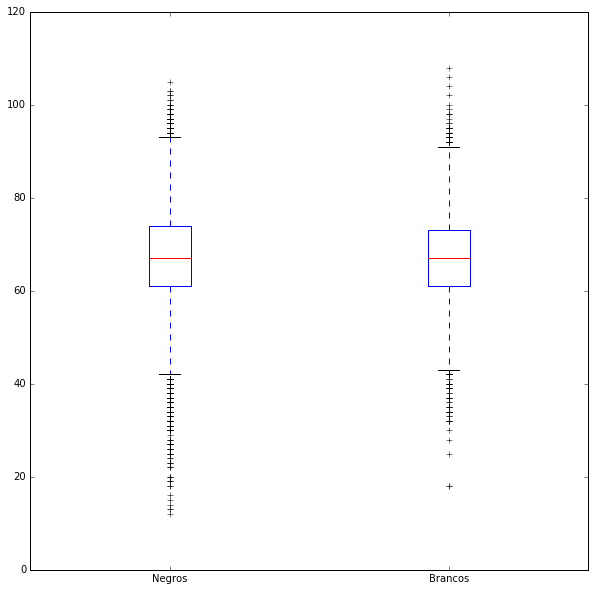

In [96]:
pnad2014.idade_raca = pd.DataFrame([idade_opos[pnad2014.raca == 2],idade_opos[pnad2014.raca == 4]])

pnad2014.idade_raca = pnad2014.idade_raca.T
pnad2014.idade_raca.columns = 'Negros','Brancos'

pnad2014.idade_raca.plot.box(figsize=(10,10))

___

___
## Conclusão 

Inicialmente verificamos que o número de aposentados negros é menor que o número de aposentados brancos, muito embora a população 
negra seja maioria. A mediana da renda dos aposentados brancos é de 1108 reais, ao passo que a mediana dos aposentados negros é em torno 
de 730 reais, o que sgnifica que os aposentados brancos ganham mais. 3171 brancos possuem curso de graduação completo, ao passo que apenas 949 pardos e 204 pretos possuem.
De maneira geral, pela tabela de dados cruzados do curso mais elevado percebe-se que os aposentados brancos obtiveram maior grau de instrução, 
e, assim, mais oportunidades de trabalho, o que pode ser uma das justificativas para sua melhor situação atual relativa.


O argumento mais forte que permite reforçar a tese de que o grupo dos aposentados brancos está melhor, contudo, é a análise dos 
gráficos de correlação entre anos de estudo e renda. Observa-se uma tendência geral na sociedade que, quanto mais anos uma pessoa
estuda, maior tende a ser a sua renda (podem haver exceções, pois trata-se de uma tendência geral). Verificamos que o coeficiente angular é: 
222.92 para os brancos, 120.93 para os pardos e para os negros, 99.69. Estes números significam que os brancos tendem a ganhar aproximadamente
duas vezes mais que os de raça preta, conforme estudam por mais tempo (222.92/99.96 = 2.23).
A análise dos dados revela que este grupo pode estar sub-representado na sociedade, bem como sofrer de problemas, de variadas origens (histórica, por
exemplo).